In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sp
from sklearn  import model_selection
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) #This option displays all the columns

In [3]:
#Importing dataset
car_train=pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter7_RF_Boosting\Datasets\car_accidents\car_sensors.csv")

In [4]:
#Get an idea on number of rows and columns
print(car_train.shape)

(33239, 23)


In [5]:
#Print the column names
print(car_train.columns)

Index(['safe', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22'],
      dtype='object')


In [6]:
#Print the column types
print(car_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33239 entries, 0 to 33238
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   safe    33239 non-null  int64  
 1   S1      33239 non-null  float64
 2   S2      33239 non-null  float64
 3   S3      33239 non-null  float64
 4   S4      33239 non-null  int64  
 5   S5      33239 non-null  float64
 6   S6      33239 non-null  float64
 7   S7      33239 non-null  float64
 8   S8      33239 non-null  int64  
 9   S9      33239 non-null  int64  
 10  S10     33239 non-null  float64
 11  S11     33239 non-null  int64  
 12  S12     33239 non-null  int64  
 13  S13     33239 non-null  int64  
 14  S14     33239 non-null  int64  
 15  S15     33239 non-null  float64
 16  S16     33239 non-null  float64
 17  S17     33239 non-null  int64  
 18  S18     33239 non-null  float64
 19  S19     33239 non-null  int64  
 20  S20     33239 non-null  float64
 21  S21     33239 non-null  int64  
 22

In [7]:
##Data Exploration
#Summary
all_cols_summary=car_train.describe()
print(round(all_cols_summary,2))

           safe        S1        S2        S3         S4        S5        S6  \
count  33239.00  33239.00  33239.00  33239.00   33239.00  33239.00  33239.00   
mean       0.58     35.46     12.04      0.18     837.14     77.98     10.44   
std        0.49      7.27      3.75      0.33    2187.28     18.95     13.96   
min        0.00    -22.16    -45.61      0.04     136.00      0.26      0.00   
25%        0.00     31.79      9.92      0.09     668.00     66.67      0.00   
50%        1.00     34.16     11.43      0.11     800.00     75.00      0.00   
75%        1.00     37.37     13.72      0.14     900.00     89.82     28.18   
max        1.00    101.34     71.15     11.72  228812.00    441.18     96.84   

             S7        S8        S9       S10       S11       S12       S13  \
count  33239.00  33239.00  33239.00  33239.00  33239.00  33239.00  33239.00   
mean     103.32      0.28     -4.05      0.02    358.82      1.37      0.88   
std      127.53      0.99     35.90      0

In [8]:
#Target variable
print(car_train['safe'].value_counts())

1    19139
0    14100
Name: safe, dtype: int64


In [9]:
##Defining train and test data
features=car_train.columns.values[1:]
print(features)
X = car_train[features]
y = car_train['safe']

['S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'S7' 'S8' 'S9' 'S10' 'S11' 'S12' 'S13'
 'S14' 'S15' 'S16' 'S17' 'S18' 'S19' 'S20' 'S21' 'S22']


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.2, random_state=55)
print("X_train Shape ",X_train.shape)
print("y_train Shape ", y_train.shape)
print("X_test Shape ",X_test.shape)
print("y_test Shape ", y_test.shape)

X_train Shape  (26591, 22)
y_train Shape  (26591,)
X_test Shape  (6648, 22)
y_test Shape  (6648,)


In [11]:
###buildng Decision tree on the training data ####
D_tree = tree.DecisionTreeClassifier(max_depth=7)
D_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [12]:
#####Accuracy on train data ####
tree_predict1=D_tree.predict(X_train)
cm1 = confusion_matrix(y_train,tree_predict1)
accuracy_train=(cm1[0,0]+cm1[1,1])/sum(sum(cm1))
print("Decison Tree Accuracy on Train data = ", round(accuracy_train,2))

Decison Tree Accuracy on Train data =  0.88


In [13]:
#####Accuracy on test data ####
tree_predict2=D_tree.predict(X_test)
cm2 = confusion_matrix(y_test,tree_predict2)
accuracy_test=(cm2[0,0]+cm2[1,1])/sum(sum(cm2))
print("Decison Tree Accuracy on Test data = ", round(accuracy_test,2) )

Decison Tree Accuracy on Test data =  0.88


In [14]:
##AUC on Train data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tree_predict1)
auc_train = auc(false_positive_rate, true_positive_rate)
print("Decison Tree AUC on Train data = ", round(auc_train,2) )

Decison Tree AUC on Train data =  0.87


In [15]:
##AUC on Test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tree_predict2)
auc_test = auc(false_positive_rate, true_positive_rate)
print("Decison Tree AUC on Test data = ", round(auc_test,2) )

Decison Tree AUC on Test data =  0.87


In [16]:
####Building Random Forest Model
R_forest=RandomForestClassifier(n_estimators=300, max_features=4, max_depth=10)
R_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=300)

In [17]:
#####Accuracy on train data ####
forest_predict1=R_forest.predict(X_train)
cm1 = confusion_matrix(y_train,forest_predict1)
accuracy_train=(cm1[0,0]+cm1[1,1])/sum(sum(cm1))
print("Random Forest Accuracy on Train data = ", round(accuracy_train,2) )

Random Forest Accuracy on Train data =  0.92


In [18]:
####Accuracy on test data ####
forest_predict2=R_forest.predict(X_test)
cm2 = confusion_matrix(y_test,forest_predict2)
accuracy_test=(cm2[0,0]+cm2[1,1])/sum(sum(cm2))
print("Random Forest Accuracy on Test data = ", round(accuracy_test,2) )

Random Forest Accuracy on Test data =  0.91


In [19]:
##AUC on Train data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, forest_predict1)
auc_train = auc(false_positive_rate, true_positive_rate)
print("Random Forest AUC on Train data =  ", round(auc_train,2) )

Random Forest AUC on Train data =   0.91


In [20]:
##AUC on Test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_predict2)
auc_test= auc(false_positive_rate, true_positive_rate)
print("Random Forest AUC on Test data =  ", round(auc_test,2) )

Random Forest AUC on Test data =   0.9


In [21]:
#################################

#####GBM illustration

import pandas as pd
pets_data = pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter7_RF_Boosting\Datasets\Pet_adoption\adoption.csv")
pets_data.columns.values
pets_data.head(10)

,Sr_No,cust_age,adopted_pet
0,1,18,1
1,2,14,1
2,3,22,0
3,4,39,0
4,5,55,1
5,6,62,1
6,7,54,1
7,8,69,0
8,9,70,0
9,10,80,0


In [22]:
X=pets_data[["cust_age"]]
y=h=pets_data['adopted_pet']

SSE :  14.149375035688571
Accuracy :  0.782608695652174
SSE :  11.279953139781647
Accuracy :  0.782608695652174
SSE :  4.599020242391311
Accuracy :  1.0
SSE :  3.1695243228663834
Accuracy :  1.0
SSE :  2.255280817806731
Accuracy :  1.0
SSE :  1.0451902708931382
Accuracy :  1.0
SSE :  0.8158423973000433
Accuracy :  1.0
SSE :  0.6346641815889095
Accuracy :  1.0
SSE :  0.2676657569441826
Accuracy :  1.0
SSE :  0.2142188408966068
Accuracy :  1.0
SSE :  0.17335936100623148
Accuracy :  1.0
SSE :  0.07016056855230608
Accuracy :  1.0
SSE :  0.05653098101827324
Accuracy :  1.0
SSE :  0.04678671621688156
Accuracy :  1.0
SSE :  0.01853947509919179
Accuracy :  1.0
SSE :  0.01493340923621504
Accuracy :  1.0
SSE :  0.012535601331849267
Accuracy :  1.0
SSE :  0.004914886458223138
Accuracy :  1.0
SSE :  0.003945378085545498
Accuracy :  1.0
SSE :  0.0033439626063109223
Accuracy :  1.0


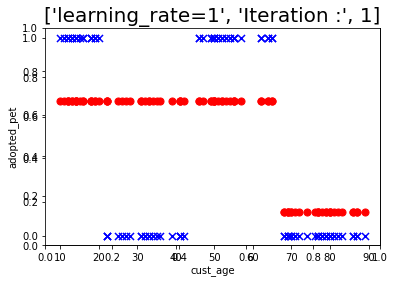

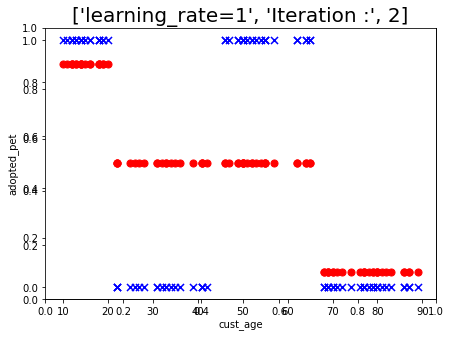

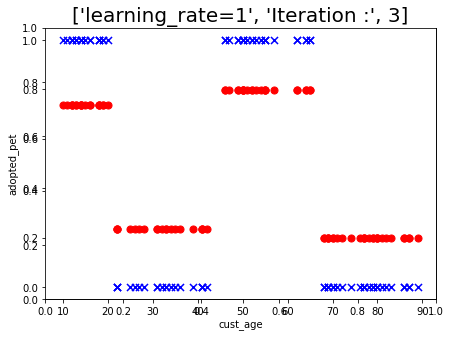

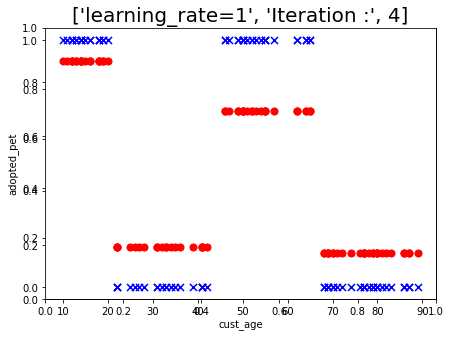

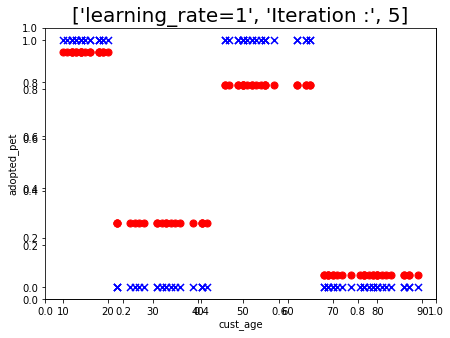

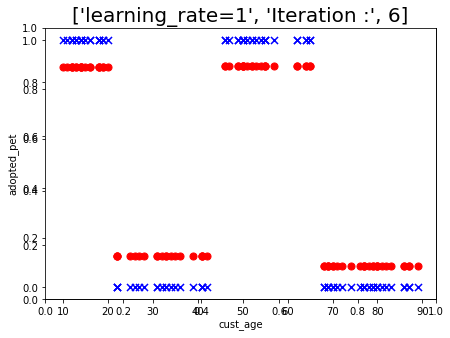

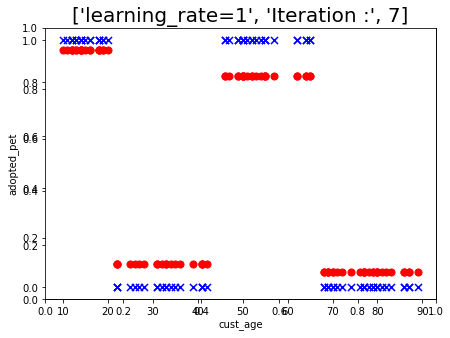

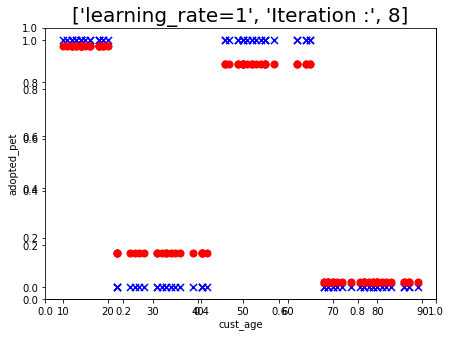

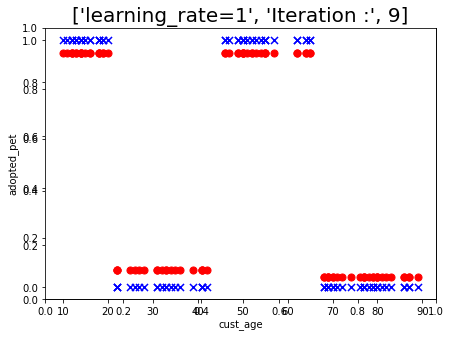

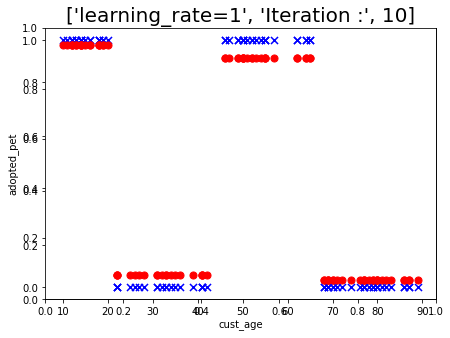

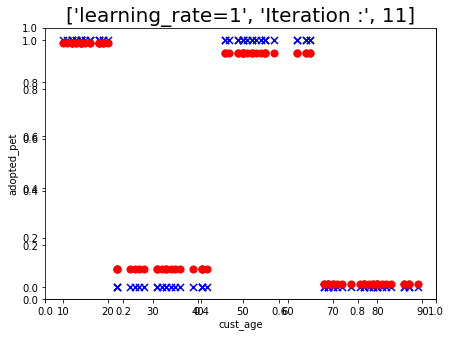

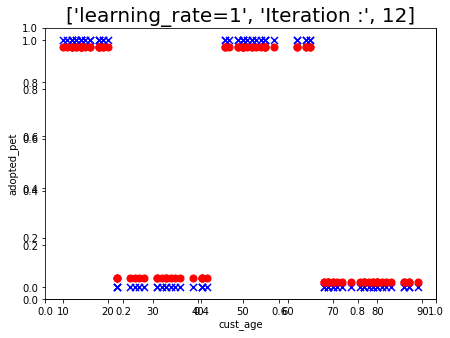

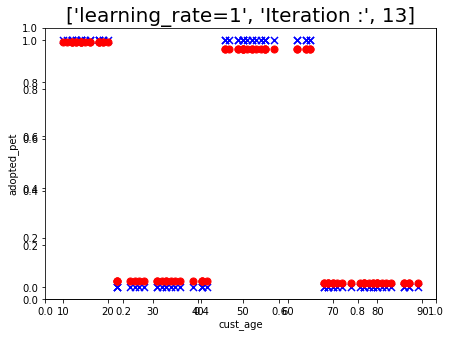

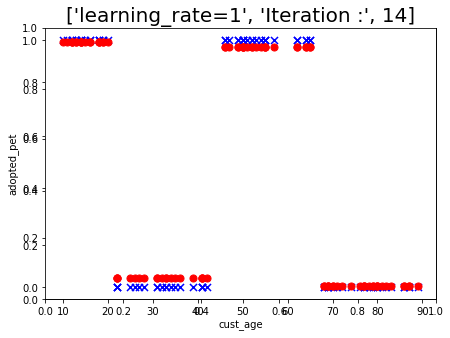

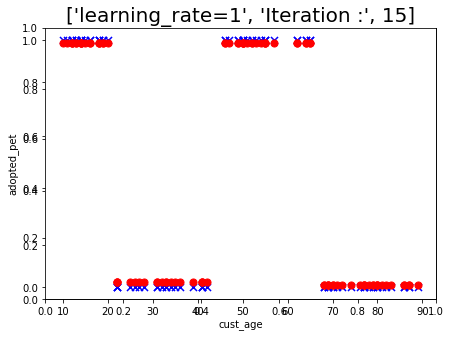

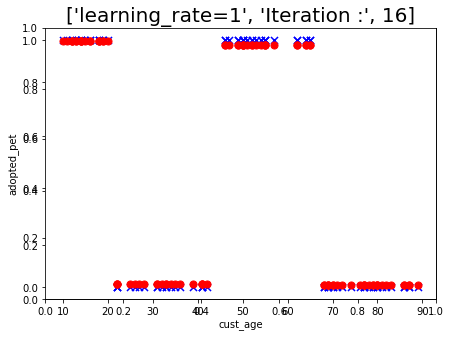

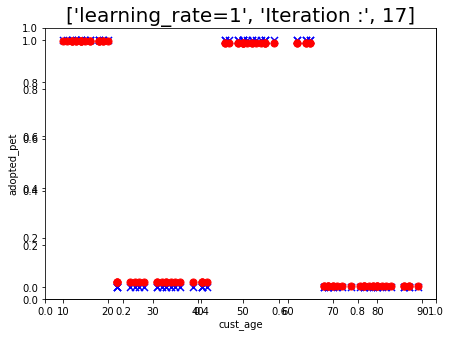

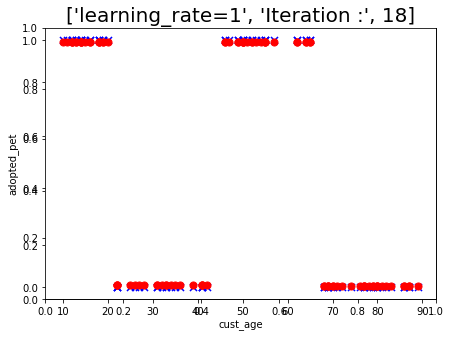

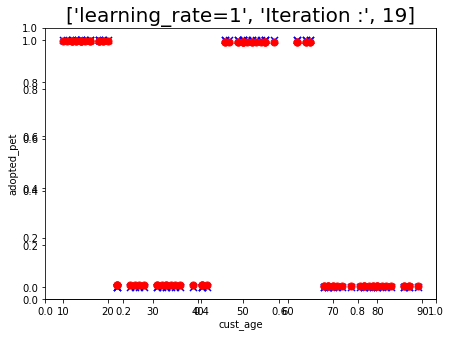

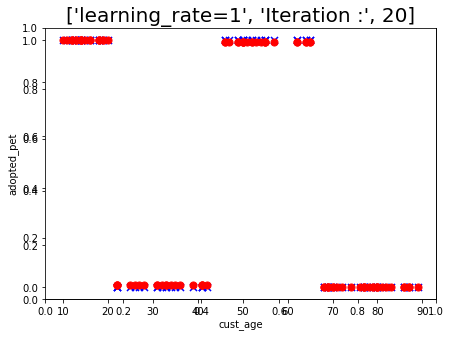

In [23]:
for i in range (1,21):
    
    #Model and predictions 
    boost_model=GradientBoostingClassifier(n_estimators=i,learning_rate=1, max_depth=1)
    boost_model.fit(X,y)
    pets_data["itaration_result"]=boost_model.predict_proba(X)[:,1]
    boost_predict= boost_model.predict(X)
    #Graph
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (7,5)
    plt.title(['learning_rate=1', 'Iteration :', i ], fontsize=20)
    ax1 = fig.add_subplot(111)
    ax1.scatter(pets_data["cust_age"],pets_data["adopted_pet"], s=50, c='b', marker="x")
    ax1.scatter(pets_data["cust_age"],pets_data["itaration_result"], s=50, c='r', marker="o")
    ax1.set_xlabel('cust_age')
    ax1.set_ylabel('adopted_pet')
    #SSE and Accuracy
    print("SSE : ", sum((pets_data["itaration_result"] - y)**2))
    accuracy=f1_score(y, boost_predict, average='micro')
    print("Accuracy : ", accuracy)

SSE :  21.21493191830362
Accuracy :  0.5217391304347826
SSE :  19.810352339118584
Accuracy :  0.782608695652174
SSE :  18.67468882233319
Accuracy :  0.782608695652174
SSE :  17.645784222431523
Accuracy :  0.782608695652174
SSE :  16.793465822920595
Accuracy :  0.782608695652174
SSE :  16.027888521818348
Accuracy :  0.782608695652174
SSE :  15.387131125486434
Accuracy :  0.782608695652174
SSE :  14.814923120173397
Accuracy :  0.782608695652174
SSE :  14.331881122108056
Accuracy :  0.782608695652174
SSE :  13.90229965952781
Accuracy :  0.782608695652174
SSE :  13.536887627392304
Accuracy :  0.782608695652174
SSE :  13.212925423549853
Accuracy :  0.782608695652174
SSE :  12.935410154696653
Accuracy :  0.782608695652174
SSE :  12.45966526251804
Accuracy :  0.782608695652174
SSE :  12.183289867306748
Accuracy :  0.782608695652174
SSE :  11.742921987949355
Accuracy :  1.0
SSE :  11.487062977045245
Accuracy :  0.782608695652174
SSE :  11.25129530455695
Accuracy :  1.0
SSE :  10.79492370550778

C:\Users\SREEHARI\AppData\Local\Temp\ipykernel_14808\1402250671.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


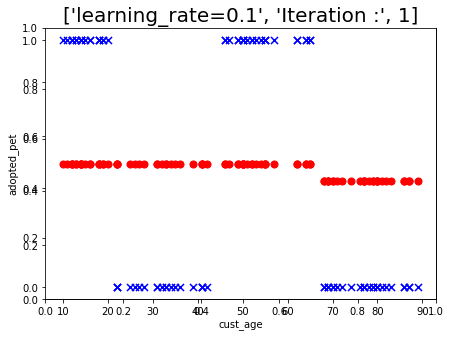

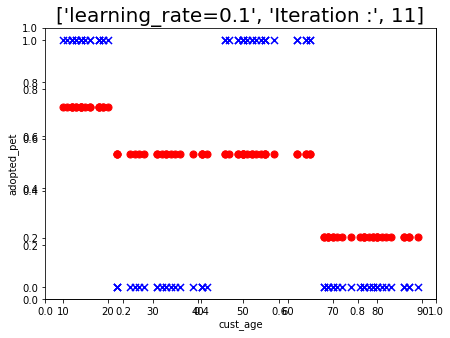

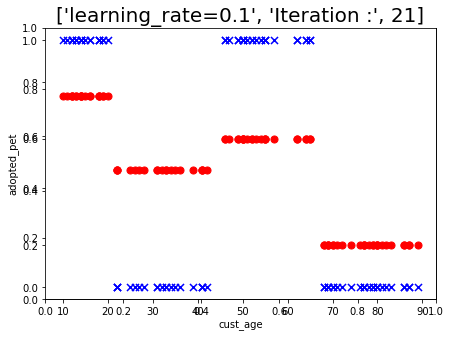

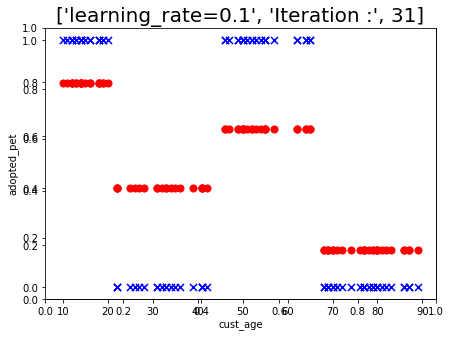

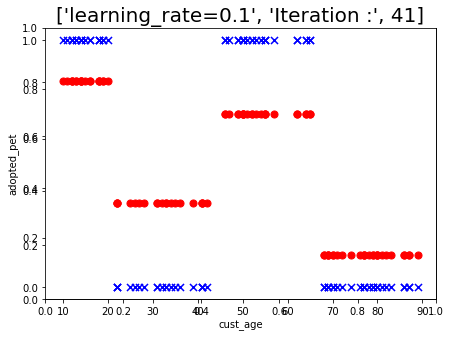

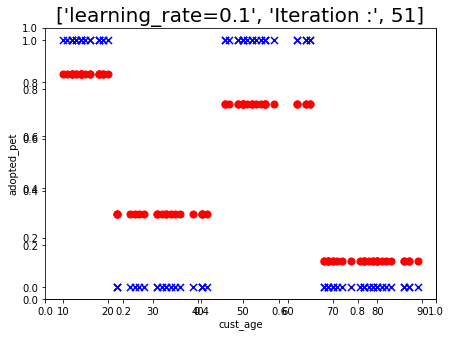

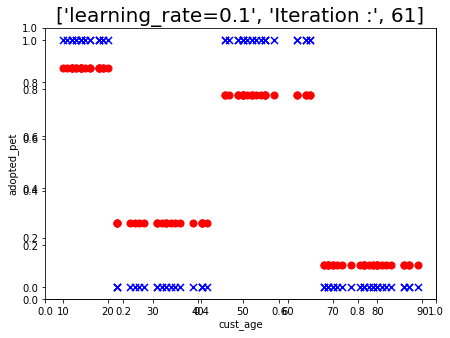

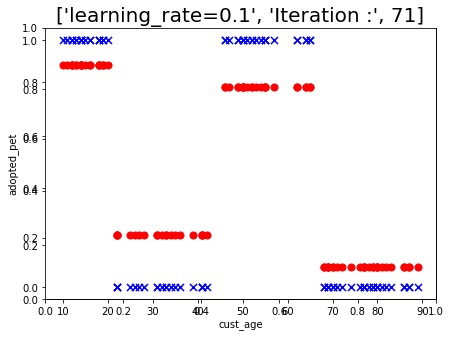

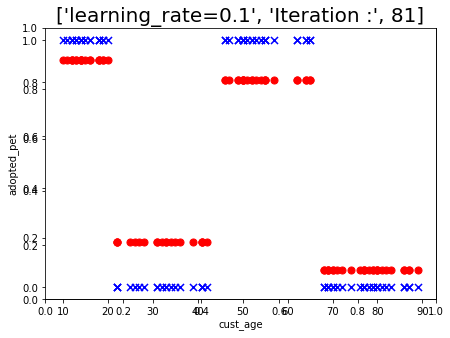

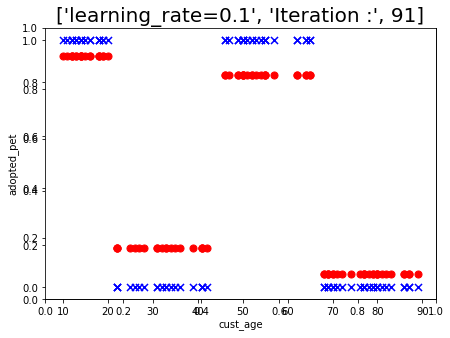

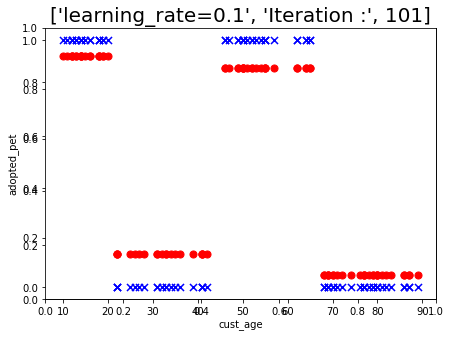

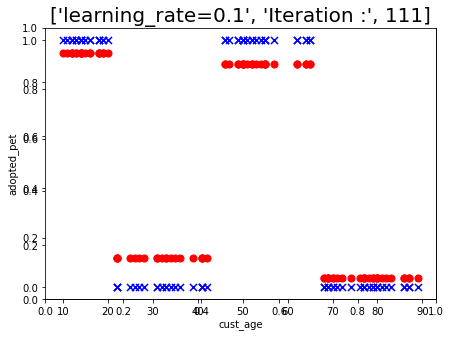

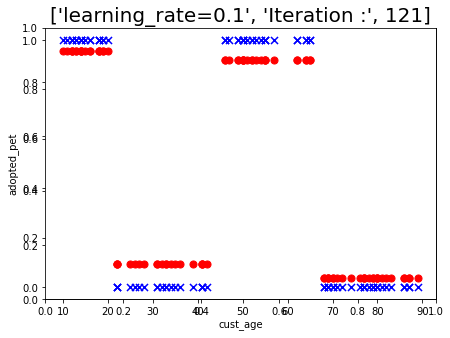

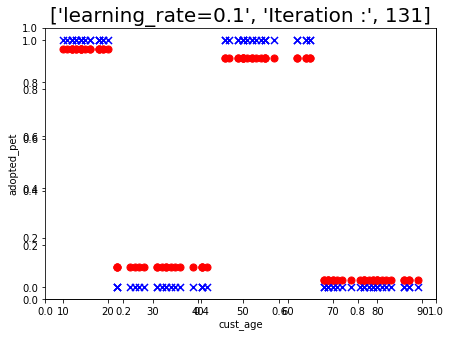

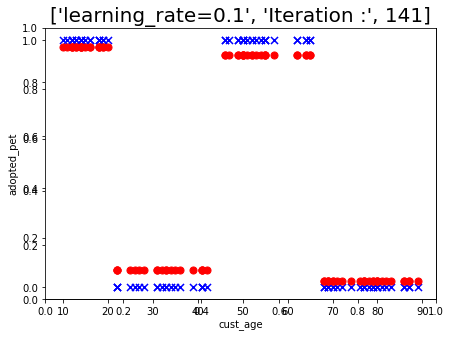

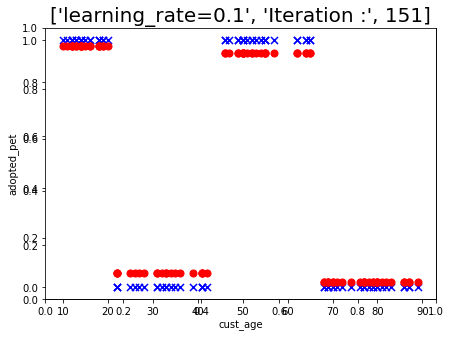

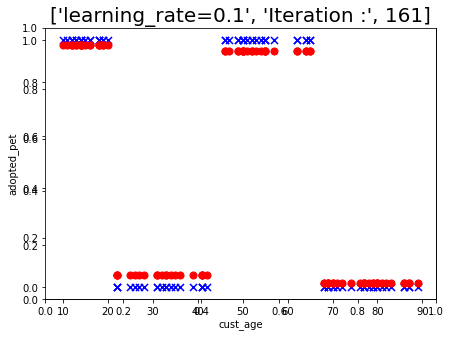

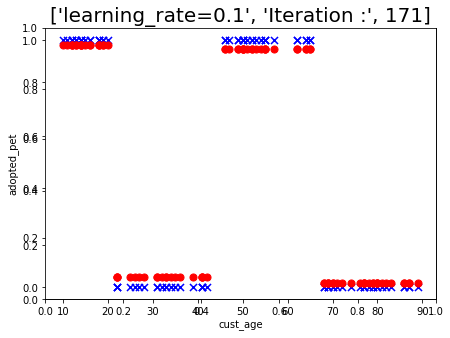

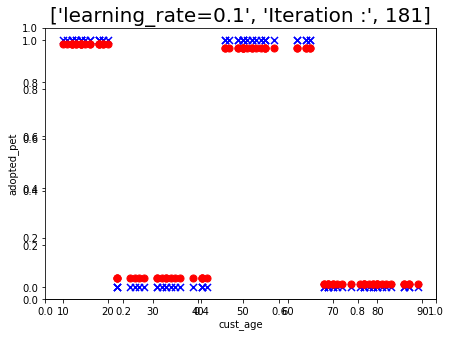

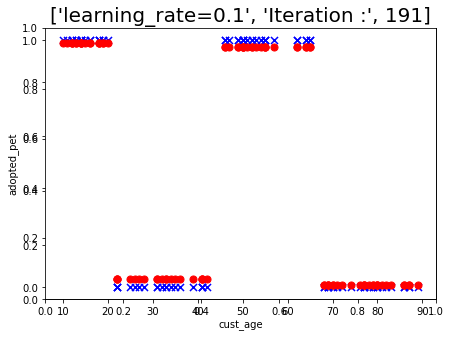

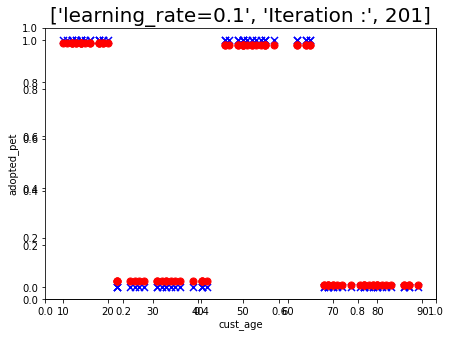

In [24]:
## New learning rate learning_rate=0.1
for i in range (1,202):
    
    #Model and predictions 
    boost_model=GradientBoostingClassifier(n_estimators=i,learning_rate=0.1, max_depth=1)
    boost_model.fit(X,y)
    pets_data["itaration_result"]=boost_model.predict_proba(X)[:,1]
    boost_predict= boost_model.predict(X)
    
    #Graph
    if(np.mod(i, 10) ==1):
        fig = plt.figure()
        plt.rcParams["figure.figsize"] = (7,5)
        plt.title(['learning_rate=0.1', 'Iteration :', i ], fontsize=20)
        ax1 = fig.add_subplot(111)
        ax1.scatter(pets_data["cust_age"],pets_data["adopted_pet"], s=50, c='b', marker="x")
        ax1.scatter(pets_data["cust_age"],pets_data["itaration_result"], s=50, c='r', marker="o")
        ax1.set_xlabel('cust_age')
        ax1.set_ylabel('adopted_pet')
        
        #SSE and Accuracy
    print("SSE : ", sum((pets_data["itaration_result"] - y)**2))
    accuracy=f1_score(y, boost_predict, average='micro')
    print("Accuracy : ", accuracy)

In [25]:
#################################
#####Case Study- Income Prediction from Census Data 

income = pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter7_RF_Boosting\Datasets\Adult_Census_Income\Adult_Income.csv")

#Get an idea on number of rows and columns
print(income.shape)

(32561, 12)


In [26]:
#Print the column names
print(income.columns)

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')


In [27]:
#Print the column types
print(income.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   sex             32561 non-null  object
 7   capital.gain    32561 non-null  int64 
 8   capital.loss    32561 non-null  int64 
 9   hours.per.week  32561 non-null  int64 
 10  native.country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB
None


In [28]:
##Data Exploration
#Summary
all_cols_summary=income.describe()
print(round(all_cols_summary,2))

            age  education.num  capital.gain  capital.loss  hours.per.week
count  32561.00       32561.00      32561.00      32561.00        32561.00
mean      38.58          10.08       1077.65         87.30           40.44
std       13.64           2.57       7385.29        402.96           12.35
min       17.00           1.00          0.00          0.00            1.00
25%       28.00           9.00          0.00          0.00           40.00
50%       37.00          10.00          0.00          0.00           40.00
75%       48.00          12.00          0.00          0.00           45.00
max       90.00          16.00      99999.00       4356.00           99.00


In [29]:
##Categorical Variables Exploration
categorical_vars=income.select_dtypes(include=['object']).columns
print(categorical_vars)

Index(['workclass', 'education', 'marital.status', 'occupation', 'sex',
       'native.country', 'income'],
      dtype='object')


In [30]:
##Frequency tables for all the categorical columns
for col in categorical_vars:
    print("\n\nFrequency Table for the column ", col )
    print(income[col].value_counts())



Frequency Table for the column  workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


Frequency Table for the column  education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


Frequency Table for the column  marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23


In [31]:
##Data Cleaning and Feature Engineering
    
##workclass
income["workclass"] = income["workclass"].replace(['?','Never-worked','Without-pay'], 'Other')  
print(income["workclass"] .value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Other                1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64


In [32]:
##marital.status
income["marital.status"] = income["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Not-married')
print(income["marital.status"] .value_counts())

Not-married              17144
Married-civ-spouse       14976
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


In [33]:
##occupation
income["occupation"] = income["occupation"].replace(['?'], 'Other-service')  
print(income["occupation"] .value_counts())

Other-service        5138
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [34]:
##Country
freq_country=income["native.country"].value_counts()
less_frequent= freq_country[freq_country <100].index
print(less_frequent)

Index(['Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy',
       'Dominican-Republic', 'Vietnam', 'Guatemala', 'Japan', 'Poland',
       'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru',
       'Greece', 'France', 'Ecuador', 'Ireland', 'Hong', 'Cambodia',
       'Trinadad&Tobago', 'Laos', 'Thailand', 'Yugoslavia',
       'Outlying-US(Guam-USVI-etc)', 'Hungary', 'Honduras', 'Scotland',
       'Holand-Netherlands'],
      dtype='object')


In [41]:
income["native.country"]=income["native.country"].replace(['less_frequent'], 'Other')
income["native.country"] = income["native.country"].replace(['?'], 'Other')  
print(income["native.country"].value_counts())

United-States                 29170
Mexico                          643
Other                           583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [42]:
## Converting Gender into class-0 and Class-1
print(income["sex"].value_counts())
income['sex']=income['sex'].map({'Male': 0, 'Female': 1})

Male      21790
Female    10771
Name: sex, dtype: int64


In [43]:
## Converting target into class-0 and Class-1
print(income["income"].value_counts())
income['income']=income['income'].map({'<=50K': 0, '>50K': 1})

<=50K    24720
>50K      7841
Name: income, dtype: int64


In [44]:
###One hot encoding 
one_hot_cols=['workclass','marital.status','occupation','native.country']
one_hot_data = pd.get_dummies(income[one_hot_cols])
print(one_hot_data.shape)
print(one_hot_data.columns.values)

(32561, 67)
['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Other'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'marital.status_Married-AF-spouse'
 'marital.status_Married-civ-spouse'
 'marital.status_Married-spouse-absent' 'marital.status_Not-married'
 'occupation_Adm-clerical' 'occupation_Armed-Forces'
 'occupation_Craft-repair' 'occupation_Exec-managerial'
 'occupation_Farming-fishing' 'occupation_Handlers-cleaners'
 'occupation_Machine-op-inspct' 'occupation_Other-service'
 'occupation_Priv-house-serv' 'occupation_Prof-specialty'
 'occupation_Protective-serv' 'occupation_Sales' 'occupation_Tech-support'
 'occupation_Transport-moving' 'native.country_Cambodia'
 'native.country_Canada' 'native.country_China' 'native.country_Columbia'
 'native.country_Cuba' 'native.country_Dominican-Republic'
 'native.country_Ecuador' 'native.country_El-Salvador'
 'native.country_England' 'native.country_France' 'native.country_Germany'
 '

In [45]:
##Final Data
print(income.shape)
income_final = pd.concat([income, one_hot_data], axis=1)
print(income_final.shape)
print(income_final.info())

(32561, 12)
(32561, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   age                                        32561 non-null  int64 
 1   workclass                                  32561 non-null  object
 2   education                                  32561 non-null  object
 3   education.num                              32561 non-null  int64 
 4   marital.status                             32561 non-null  object
 5   occupation                                 32561 non-null  object
 6   sex                                        32561 non-null  int64 
 7   capital.gain                               32561 non-null  int64 
 8   capital.loss                               32561 non-null  int64 
 9   hours.per.week                             32561 non-null  int64 
 10  native.cou

In [46]:
##Features
one_hot_features=list(one_hot_data.columns.values)
numerical_features=['age',  'education.num', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']
all_features=one_hot_features+numerical_features
print(all_features)

['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Other', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse', 'marital.status_Married-spouse-absent', 'marital.status_Not-married', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'native.country_Cambodia', 'native.country_Canada', 'native.country_China', 'native.country_Columbia', 'native.country_Cuba', 'native.country_Dominican-Republic', 'native.country_Ecuador', 'native.country_El-Salvador', 'native.country_England', 'native.country_France', 'native.country_Ger

In [47]:
##Data
X=income_final[all_features]
y=income_final['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26048, 73)
(26048,)
(6513, 73)
(6513,)


In [49]:
##Model Building
gbm_model1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=4,  n_estimators=100, verbose=1)
gbm_model1.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0982            3.86s
         2           1.0904            3.43s
         3           1.0828            3.17s
         4           1.0755            3.02s
         5           1.0684            2.96s
         6           1.0614            2.88s
         7           1.0546            2.87s
         8           1.0480            2.88s
         9           1.0416            2.90s
        10           1.0353            2.84s
        20           0.9797            2.39s
        30           0.9345            2.05s
        40           0.8967            1.76s
        50           0.8641            1.46s
        60           0.8361            1.16s
        70           0.8122            0.88s
        80           0.7913            0.60s
        90           0.7733            0.30s
       100           0.7572            0.00s


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, verbose=1)

In [50]:
##Validation on train and test data

#Train data
predictions=gbm_model1.predict(X_train)
actuals=y_train
cm = confusion_matrix(actuals,predictions)
print("Confusion Matrix on Train data\n", cm)
accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Train Accuracy", accuracy)

Confusion Matrix on Train data
 [[19137   614]
 [ 3428  2869]]
Train Accuracy 0.8448249385749386


In [51]:
#Test data
predictions=gbm_model1.predict(X_test)
actuals=y_test
cm = confusion_matrix(actuals,predictions)
print("Confusion Matrix on Test data\n", cm)
accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Test Accuracy", accuracy)

Confusion Matrix on Test data
 [[4824  145]
 [ 818  726]]
Test Accuracy 0.852141870105942


In [56]:
##Loop for different iterations
for i in range(5,1000, 50):
    gbm_model1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=4,  n_estimators=i)
    gbm_model1.fit(X_train, y_train)
    
    print("N_estimators=" , i)
    #Train data
    predictions=gbm_model1.predict(X_train)
    actuals=y_train
    cm = confusion_matrix(actuals,predictions)
    accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
    print("Train Accuracy", accuracy*100)
    #Test data
    predictions=gbm_model1.predict(X_test)
    actuals=y_test
    cm = confusion_matrix(actuals,predictions)
    accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
    print("Test Accuracy", accuracy*100)

N_estimators= 5
Train Accuracy 75.82539926289927
Test Accuracy 76.29356671272839
N_estimators= 55
Train Accuracy 81.34213759213759
Test Accuracy 82.17411331183786
N_estimators= 105
Train Accuracy 84.55543611793613
Test Accuracy 85.27560264087211
N_estimators= 155
Train Accuracy 85.20807739557739
Test Accuracy 85.5980346998311
N_estimators= 205
Train Accuracy 85.7762592137592
Test Accuracy 86.33502226316597
N_estimators= 255
Train Accuracy 85.9375
Test Accuracy 86.51926915399969
N_estimators= 305
Train Accuracy 86.17936117936118
Test Accuracy 86.41179180101336
N_estimators= 355
Train Accuracy 86.3713144963145
Test Accuracy 86.42714570858283
N_estimators= 405
Train Accuracy 86.4519348894349
Test Accuracy 86.41179180101336
N_estimators= 455
Train Accuracy 86.7129914004914
Test Accuracy 86.44249961615232
N_estimators= 505
Train Accuracy 86.83200245700246
Test Accuracy 86.54997696913864
N_estimators= 555
Train Accuracy 86.93181818181817
Test Accuracy 86.53462306156918
N_estimators= 605
Trai